In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [ ]:
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Large_Data.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
os.listdir('/tmp/Large_Data')

['val', 'test', 'train']

In [ ]:
train_path="/tmp/Large_Data/train"
test_path="/tmp/Large_Data/test"
val_path="/tmp/Large_Data/val"

In [ ]:
image_shape = (399,500,3)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [ ]:
os.listdir(train_path)

['street sign',
 'jean',
 'school bus',
 'grass snake',
 'bicycle',
 'traffic light']

In [ ]:
batch_size = 16

In [ ]:
training_set = image_gen.flow_from_directory(train_path,
                                                 target_size = image_shape[:2],
                                                 color_mode='rgb',
                                                 batch_size=batch_size,
                                                 class_mode = 'sparse')
test_set = image_gen.flow_from_directory(test_path,
                                            target_size = image_shape[:2],
                                            color_mode='rgb',
                                            batch_size=batch_size,
                                            class_mode = 'sparse',
                                            shuffle=False)
val_set = image_gen.flow_from_directory(val_path,
                                            target_size = image_shape[:2],
                                            color_mode='rgb',
                                            batch_size=batch_size,
                                            class_mode = 'sparse',
                                            shuffle=False)

Found 5346 images belonging to 6 classes.
Found 595 images belonging to 6 classes.
Found 1782 images belonging to 6 classes.


In [ ]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [ ]:
training_set.class_indices

{'bicycle': 0,
 'grass snake': 1,
 'jean': 2,
 'school bus': 3,
 'street sign': 4,
 'traffic light': 5}

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPool2D

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=image_shape,
                activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=64,kernel_size=(3,3),
                 input_shape=image_shape,
                activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=64,kernel_size=(3,3),
                 input_shape=image_shape,
                activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(6,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',
             metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 399, 500, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 199, 250, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 199, 250, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 99, 125, 64)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 99, 125, 64)       36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 49, 62, 64)      

In [ ]:
results = model.fit(training_set,
                    validation_data=val_set,
                    callbacks=[early_stop],
                    epochs=20)

Epoch 1/20
335/335 [==============================] - 311s 928ms/step - loss: 1.5855 - accuracy: 0.4388 - val_loss: 1.2883 - val_accuracy: 0.5224
Epoch 2/20
335/335 [==============================] - 307s 916ms/step - loss: 1.1361 - accuracy: 0.5795 - val_loss: 0.8586 - val_accuracy: 0.7043
Epoch 3/20
335/335 [==============================] - 306s 913ms/step - loss: 0.9578 - accuracy: 0.6566 - val_loss: 0.8710 - val_accuracy: 0.6801
Epoch 4/20
335/335 [==============================] - 306s 914ms/step - loss: 0.8937 - accuracy: 0.6828 - val_loss: 0.9286 - val_accuracy: 0.6930
Epoch 5/20
335/335 [==============================] - 305s 910ms/step - loss: 0.8917 - accuracy: 0.6857 - val_loss: 0.7622 - val_accuracy: 0.7301
Epoch 6/20
335/335 [==============================] - 305s 911ms/step - loss: 0.8329 - accuracy: 0.7045 - val_loss: 0.8126 - val_accuracy: 0.7205
Epoch 7/20
335/335 [==============================] - 305s 910ms/step - loss: 0.8267 - accuracy: 0.7058 - val_loss: 0.6550 -

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.585458,0.438833,1.288271,0.522447
1,1.136052,0.579499,0.858577,0.704265
2,0.957790,0.656566,0.870952,0.680135
3,0.893660,0.682753,0.928597,0.693042
4,0.891716,0.685746,0.762246,0.730079


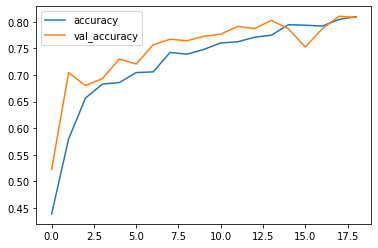

In [ ]:
losses[['accuracy','val_accuracy']].plot()

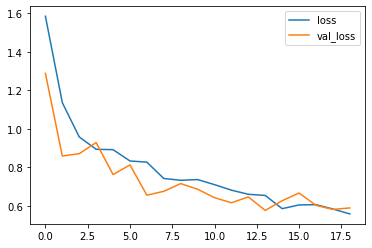

In [ ]:
losses[['loss','val_loss']].plot()

In [ ]:
model.evaluate(test_set,batch_size=32)

38/38 [==============================] - 25s 659ms/step - loss: 0.5750 - accuracy: 0.8134


[0.5750206112861633, 0.8134453892707825]

In [ ]:
model.save('large_data_model_20_3.h5')

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
predict_y=model.predict(test_set)
classes_y=np.argmax(predict_y,axis=1)

In [ ]:
print(classification_report(test_set.classes,classes_y))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        99
           1       0.90      0.95      0.93       100
           2       0.79      0.83      0.81       100
           3       0.91      0.99      0.95        96
           4       0.86      0.62      0.72       100
           5       0.74      0.70      0.72       100

    accuracy                           0.83       595
   macro avg       0.83      0.83      0.83       595
weighted avg       0.83      0.83      0.83       595

